<a href="https://colab.research.google.com/github/kyleishaumbay/Umbay-Hierro-CSCI-161.03-UV2/blob/main/%5BUmbayHierro%5D_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TOPIC: Elon Musk Related Youtube Sentiments**

# Exploratory data analysis

In [ ]:
!pip install nltk
!pip install seaborn
!pip install wordcloud

In [ ]:
# Ignore some warnings from being printed out
import warnings

warnings.filterwarnings('ignore')

In importing the NLTK module, we also instantiate two things necessary for cleaning our texts:

1.   `stopwords`: list of words that occur frequently in the English language but rarely add insight to analyses (e.g., *the*, *is*, *from*)
2.   `lemmatizer`: object for converting words to their lemma or root (i.e., *changing* to *change*)



In [49]:
# Instatiate NLTK module
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
stopwords = stopwords.words('english')
# add more stopwords (domain sotpwords)
stopwords += ['people', 'like', 'go', 'get', 'know', 'dont', 'one','want', 'make', 'need', 'think', 'good', 'say', 'see',
    'would','come','take','ha','back','look','work','never','man','help',
    'love','im','cant','guy','give','big','time','really','right','buy',
    'care','much','nothing','even','let','show','still','thing','use','way',
    'try','believe','find','side','talk','person','pay','every','could',
    'end','something','stop','call','mean','doesnt','life','another','youre',
    'many','understand','real','well','tell','start','please','thats',
    'watch','always','leave','best','anyone','year','everything','change', 'thank'
    'cut','didnt','run','day', 'elon', 'musk']
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Then, we import and configure other necessary packages.

In [50]:
# Set up visualization configurations
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.style as style

# style.use('fivethirtyeight')
sns.set(rc={'figure.figsize': (12, 6)})

In [51]:
# Import other necessary packages
import pandas as pd

In [52]:
try:
  # Google Colab
  from google.colab import drive
  drive.mount('/content/drive')

  # Instantiate location and name of file to be analyzed
  # Update this path XOXOXO
  file_name = '/content/drive/My Drive/elonmusk_youtube_corpus.xlsx'
except:
  file_name = 'elonmusk_youtube_corpus.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Getting to Know the Data

The first step in any data analysis pipeline is to understand what the data is and how it is structured. So let's get a preview of our dataset.

In [53]:
comments = pd.read_excel(file_name)
comments.head(5)

,Unnamed: 0,title,link,date_published,text,like_count,reply_parent_id
0,0,"Um, no... Elon&#39;s &quot;day job&quot; is fl...",https://www.youtube.com/watch?v=OBnHxfHBv2o&lc...,2025-09-08T10:00:34Z,"Um, no... Elon's ""day job"" is flapping his yap...",0,NaN
1,1,Are these same people who were mocking about t...,https://www.youtube.com/watch?v=OBnHxfHBv2o&lc...,2025-09-04T17:38:57Z,Are these same people who were mocking about t...,0,NaN
2,2,And there it is. America will never be free of...,https://www.youtube.com/watch?v=OBnHxfHBv2o&lc...,2025-08-31T10:49:12Z,And there it is. America will never be free of...,0,NaN
3,3,👁️👽🗿🌬️💥🔥⚡🌌🌠🌀☄️🌊🌋🕳️🕎🌎,https://www.youtube.com/watch?v=OBnHxfHBv2o&lc...,2025-08-30T16:49:25Z,👁️👽🗿🌬️💥🔥⚡🌌🌠🌀☄️🌊🌋🕳️🕎🌎,0,NaN
4,4,That sounds crazy. Two parties already have bi...,https://www.youtube.com/watch?v=OBnHxfHBv2o&lc...,2025-08-29T05:35:15Z,That sounds crazy. Two parties already have bi...,0,NaN


Now, let's check further details about our tweet dataset.

In [54]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3202 non-null   int64 
 1   title            3202 non-null   object
 2   link             3202 non-null   object
 3   date_published   3202 non-null   object
 4   text             3199 non-null   object
 5   like_count       3202 non-null   int64 
 6   reply_parent_id  434 non-null    object
dtypes: int64(2), object(5)
memory usage: 175.2+ KB


### Pre-processing and Cleaning

Before proceeding with any analysis, it would be best to start by cleaning and pre-processing the data to ensure its quality and the quality of resulting analyses.

We start by converting the data under the 'tweets_created' column to date data types. Presently, this data is in a string format.

In [55]:
type(comments.loc[0, 'date_published'])

str

In [56]:
comments['date_published'] = pd.to_datetime(comments['date_published']).dt.date
type(comments.loc[0, 'date_published'])

datetime.date



```
# This is formatted as code
```

Next, we clean the texts under the 'text' column so that when we generate a word cloud analysis based on these later, we actually get a menaingful visualization.

In [57]:
# Add the airline names to the list of stopwords
additional_stopwords = comments['text'].unique()
stopwords.extend(additional_stopwords)

In [58]:
from nltk.stem import PorterStemmer
text = 'before'

# Lemmatization went --> go (pos='v')
print(' '.join(
  [lemmatizer.lemmatize(word, pos='v') for word in str(text).split()]
))

# Stemming went --> went
stemmer = PorterStemmer()
print(' '.join(
  [stemmer.stem(word) for word in str(text).split()]
))

before
befor


In [92]:
def clean_comments(comments):
  # Transform into lowercase
  comments['cleaned_text'] = comments['text'].str.lower()

  # Remove usernames, non-alphanumeric characters, and links
  comments['cleaned_text'] = comments['cleaned_text'].str.replace(r'(@[A-Za-z0-9_]+)|([^A-Za-z0-9_ \t])|(\w+:\/\/\S+)', '', regex=True)

  # Fill NaN values with empty string
  comments['cleaned_text'] = comments['cleaned_text'].fillna('')

  # Remove stopwords
  comments['cleaned_text'] = comments['cleaned_text'].apply(
    lambda row: ' '.join([word for word in row.split() if word not in (stopwords)]))

  # Lemmatize verbs
  comments['cleaned_text'] = comments['cleaned_text'].apply(
    lambda row: ' '.join([lemmatizer.lemmatize(x, 'v') for x in row.split()]))

  # Lemmatize adjectives
  comments['cleaned_text'] = comments['cleaned_text'].apply(
    lambda row: ' '.join([lemmatizer.lemmatize(x, 'a') for x in row.split()]))

  # Lemmatize nouns
  comments['cleaned_text'] = comments['cleaned_text'].apply(
    lambda row: ' '.join([lemmatizer.lemmatize(x, 'n') for x in row.split()]))

  # Remove trailing and leading whitespaces
  comments['cleaned_text'] = comments['cleaned_text'].str.replace(r'^\s+|\s+$', '', regex=True)

  return comments

In [93]:
cleaned_comments = clean_comments(comments)
cleaned_comments.head()

,Unnamed: 0,title,link,date_published,text,like_count,reply_parent_id,cleaned_text,year,year_group
0,0,"Um, no... Elon&#39;s &quot;day job&quot; is fl...",https://www.youtube.com/watch?v=OBnHxfHBv2o&lc...,2025-09-08,"Um, no... Elon's ""day job"" is flapping his yap...",0,NaN,um elons job flap yapper twatter,2025,2025
1,1,Are these same people who were mocking about t...,https://www.youtube.com/watch?v=OBnHxfHBv2o&lc...,2025-09-04,Are these same people who were mocking about t...,0,NaN,mock rocket early,2025,2025
2,2,And there it is. America will never be free of...,https://www.youtube.com/watch?v=OBnHxfHBv2o&lc...,2025-08-31,And there it is. America will never be free of...,0,NaN,america free two party system party achieve wh...,2025,2025
3,3,👁️👽🗿🌬️💥🔥⚡🌌🌠🌀☄️🌊🌋🕳️🕎🌎,https://www.youtube.com/watch?v=OBnHxfHBv2o&lc...,2025-08-30,👁️👽🗿🌬️💥🔥⚡🌌🌠🌀☄️🌊🌋🕳️🕎🌎,0,NaN,,2025,2025
4,4,That sounds crazy. Two parties already have bi...,https://www.youtube.com/watch?v=OBnHxfHBv2o&lc...,2025-08-29,That sounds crazy. Two parties already have bi...,0,NaN,sound crazy two party already problem need pro...,2025,2025


In [94]:
cleaned_comments.loc[[11], ['text', 'cleaned_text']].values

array([['https://youtu.be/qOn_kiy7cas?si=sIdXuQVpNh2vTCMw', '']],
      dtype=object)

### Analysis of comments

In [95]:
x = cleaned_comments[['date_published', 'cleaned_text']]
x.head(5)

,date_published,cleaned_text
0,2025-09-08,um elons job flap yapper twatter
1,2025-09-04,mock rocket early
2,2025-08-31,america free two party system party achieve wh...
3,2025-08-30,
4,2025-08-29,sound crazy two party already problem need pro...


##### Word Cloud Analysis

In [96]:
cleaned_comments = comments['cleaned_text']

# Remove null values
cleaned_comments = cleaned_comments.dropna()

# Join all tweets as one piece of string
cleaned_comments = ' '.join(cleaned_comments)

# Replace all spaces with commas
cleaned_comments = cleaned_comments.replace(' ', ',')

cleaned_comments

'um,elons,job,flap,yapper,twatter,mock,rocket,early,america,free,two,party,system,party,achieve,whatever,destroy,alternativeyou,american,blind,,sound,crazy,two,party,already,problem,need,problem,whatever,say,regard,usa,impotent,country,whole,balance,wish,u,strong,forever,behalf,justice,justice,hope,world,continue,suppress,head,violate,human,right,support,weak,ban,musk,product,germany,tax,heavilyor,maybe,leave,eye,gut,ask,trump,basis,claim,war,ukraine,russia,false,claim,maga,message,british,rule,class,head,state,condemn,british,empire,rule,class,head,state,say,openly,know,fundamental,difference,britain,workingclass,incompetent,upper,rule,class,today,live,relative,confirm,disgust,stupid,rule,class,follow,1ahmed,ben,bella,2,kenneth,kaunda,3,joshua,nkomo,4,jawaharlal,nehru,5,patrice,lumumba,6,kwame,nkruma,7,rajendra,prasad,8,ali,abdulla,saleh,9,jomo,kenyatta,10,achmed,sukarno,11,motilal,nehru,12,sayyid,adubakr,bin,shaikh,13,abdulla,osman,daar,14,hastings,banda,15,president,gadaffi,grand,fa

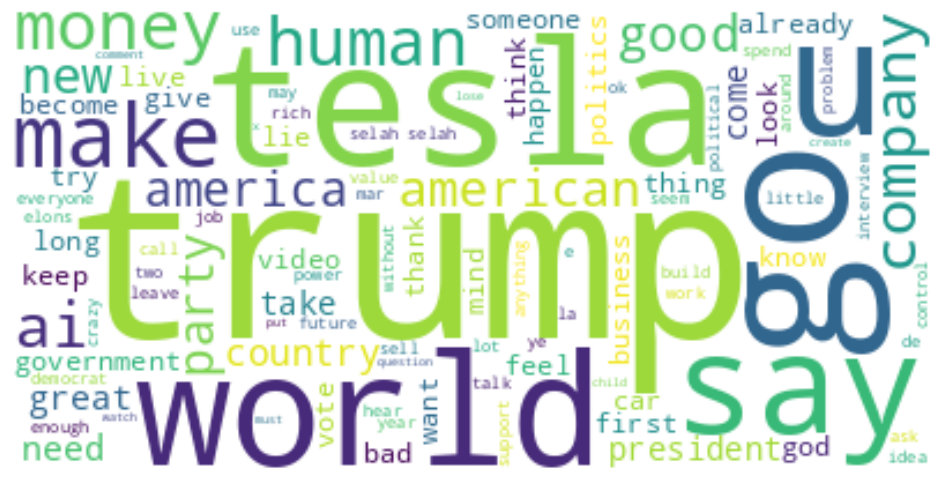

In [97]:
wc = WordCloud(background_color="white",
               # colormap='plasma',
               max_words=100
               )

wc.generate(cleaned_comments)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.close()

##### Term Frequency-Based Analysis

Word clouds are one way of visualizing which terms appear most frequently in a textual dataset. Another approach is to generate bar charts visualizing raw counts of words in the dataset. For this part of the notebook, we'll see how we can create a function that creates both bar charts and word clouds to help us make analyses based on term frequencies.

First, we import the `CountVectorizer` module from the `scikit-learn` (here abbreviated as `sklearn`) package.

1.   `scikit-learn`: library of machine learning algorithms; helps automate a lot of the complex and tedious mathematical calculations involved in machine learning (https://scikit-learn.org/stable/)
2.   `CountVectorizer`: converts text documents into a matrix of term frequency counts (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)



In [98]:
from sklearn.feature_extraction.text import CountVectorizer

Next, we create a sample corpus on which we will use `CountVectorizer` to understand how this particular module works.

In [99]:
# Use the cleaned text from the Elon Musk comments as the corpus
corpus = comments['cleaned_text']

We now initialize a `vectorizer` object that will skip over counting the stop words (as dictated by the `stopwords=stopwords`argument) and that will only count the frequency of the 2,000 most frequent words (as dictated by the `max_features=2000` argument).

We then fit (i.e., apply) this `vectorizer` object on our sample corpus, and this object then transforms the corpus into a matrix, which we store in the `matrix` variable.

In [100]:
vectorizer = CountVectorizer(stop_words=stopwords, max_features=2000)
matrix = vectorizer.fit_transform(corpus)

To view the matrix, we convert it to an array. Each row in matrices produced by `CountVectorizer` corresponds to a textual entry in the corpus.

In [101]:
matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Meanwhile, each column corresponds to a word in the corpus. To find out what word corresponds to each column, we use the `get_feature_names_out` method of our `vectorizer` object. In the output, the first word corresponds to the first column of the matrix; the second word to the second column; etc.

In [102]:
vectorizer.get_feature_names_out()

array(['024', '10', '100', ..., 'youve', 'zelensky', 'zero'], dtype=object)

We can also use the `sum` method to figure out how many words there are in each textual entry (summing across rows, `axis=1`) or how many times a particular word occurs (summing across columns, `axis=0`).

In [103]:
matrix.sum(axis=1)

matrix([[ 3],
        [ 2],
        [11],
        ...,
        [ 5],
        [13],
        [51]])

In [104]:
matrix.sum(axis=0)

matrix([[ 4, 26, 17, ..., 11,  6,  9]])

Now, we need to figure out a way to match the term frequency counts with their corresponding terms. To do this, we need to know what the index of each term is in the matrix.

The code below outputs the terms in the matrix and their corresponding indices.



In [105]:
vectorizer.vocabulary_.items()

dict_items([('um', np.int64(1855)), ('elons', np.int64(614)), ('job', np.int64(1007)), ('rocket', np.int64(1529)), ('early', np.int64(589)), ('america', np.int64(125)), ('free', np.int64(763)), ('two', np.int64(1847)), ('party', np.int64(1293)), ('system', np.int64(1731)), ('achieve', np.int64(57)), ('whatever', np.int64(1948)), ('destroy', np.int64(533)), ('american', np.int64(126)), ('blind', np.int64(244)), ('sound', np.int64(1645)), ('crazy', np.int64(445)), ('already', np.int64(117)), ('problem', np.int64(1387)), ('regard', np.int64(1474)), ('usa', np.int64(1881)), ('country', np.int64(435)), ('whole', np.int64(1956)), ('balance', np.int64(202)), ('wish', np.int64(1963)), ('strong', np.int64(1690)), ('forever', np.int64(748)), ('behalf', np.int64(216)), ('justice', np.int64(1016)), ('hope', np.int64(887)), ('world', np.int64(1976)), ('continue', np.int64(417)), ('head', np.int64(855)), ('violate', np.int64(1906)), ('human', np.int64(898)), ('support', np.int64(1719)), ('weak', np.

We can now loop through the list of tuples (data point pairs) above in order to match each term with its corresponding frequency from the summed matrix we showed above.

In [106]:
total_per_ngram = matrix.sum(axis=0)
frequency = [(w, total_per_ngram[0, i]) for w, i in vectorizer.vocabulary_.items()]
frequency

[('um', np.int64(3)),
 ('elons', np.int64(37)),
 ('job', np.int64(45)),
 ('rocket', np.int64(22)),
 ('early', np.int64(10)),
 ('america', np.int64(95)),
 ('free', np.int64(40)),
 ('two', np.int64(50)),
 ('party', np.int64(168)),
 ('system', np.int64(36)),
 ('achieve', np.int64(9)),
 ('whatever', np.int64(20)),
 ('destroy', np.int64(34)),
 ('american', np.int64(95)),
 ('blind', np.int64(7)),
 ('sound', np.int64(27)),
 ('crazy', np.int64(39)),
 ('already', np.int64(62)),
 ('problem', np.int64(40)),
 ('regard', np.int64(9)),
 ('usa', np.int64(37)),
 ('country', np.int64(80)),
 ('whole', np.int64(28)),
 ('balance', np.int64(10)),
 ('wish', np.int64(12)),
 ('strong', np.int64(7)),
 ('forever', np.int64(10)),
 ('behalf', np.int64(8)),
 ('justice', np.int64(7)),
 ('hope', np.int64(32)),
 ('world', np.int64(117)),
 ('continue', np.int64(26)),
 ('head', np.int64(29)),
 ('violate', np.int64(4)),
 ('human', np.int64(105)),
 ('support', np.int64(40)),
 ('weak', np.int64(10)),
 ('product', np.int64

We can then convert the resulting list to a dataframe and sort this dataframe by the frequency of the words.

In [107]:
frequency = pd.DataFrame(frequency, columns=['term', 'frequency'])
frequency

,term,frequency
0,um,3
1,elons,37
2,job,45
3,rocket,22
4,early,10
...,...,...
1995,unherd,4
1996,readership,4
1997,reader,3
1998,female,3


In [108]:
frequency = frequency.sort_values(by='frequency', ascending=False).reset_index(drop=True)
frequency

,term,frequency
0,trump,352
1,party,168
2,tesla,162
3,money,119
4,world,117
...,...,...
1995,toxic,3
1996,sudden,3
1997,asset,3
1998,advisor,3


We can now create a bar chart visualizing the frequency of terms using this dataframe.

Let's now define a function that combines everything we did by just taking in a `vectorizer` and a `matrix` as arguments and outputting a bar chart that visualizes term frequency.

In [109]:
def visualize_frequency(matrix, vectorizer, title=None):
  total = matrix.sum(axis=0)
  frequency = [(w, total[0, i]) for w, i in vectorizer.vocabulary_.items()]
  frequency = pd.DataFrame(frequency, columns=['term', 'frequency'])
  frequency = frequency.sort_values(by='frequency', ascending=False).reset_index(drop=True)
  ax = sns.barplot(data=frequency.head(25), x='term', y='frequency')
  if title:
    ax.set_title(title)
  plt.xticks(rotation=45)
  plt.show()
  plt.close()

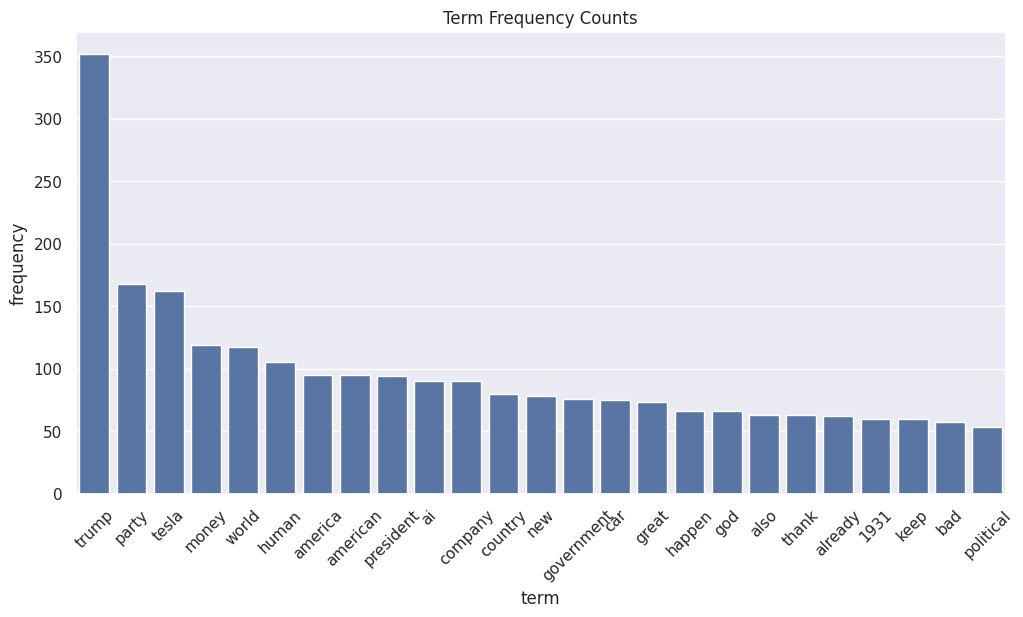

In [110]:
visualize_frequency(matrix, vectorizer, 'Term Frequency Counts')

We can also configure `CountVectorizer` such that instead of counting individual words (unigrams), it counts pairs of words or bigrams. We just need to add the `ngram_range` argument and specify the length of the word combinations we want to be counted.

An n-gram is simply a collection of words. 1-gram is an individual word, 2-grams are pairs of words, 3-grams are trios of words.

In [111]:
vectorizer = CountVectorizer(stop_words=stopwords, ngram_range=(2, 2), max_features=2000)
matrix = vectorizer.fit_transform(corpus)

In [112]:
matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [113]:
vectorizer.get_feature_names_out()

array(['0216 high', '0221 lia', '024 024', ..., 'zero crazy',
       'zero desire', 'zero empathy'], dtype=object)

In [114]:
matrix.sum(axis=0)

matrix([[1, 1, 3, ..., 1, 1, 1]])

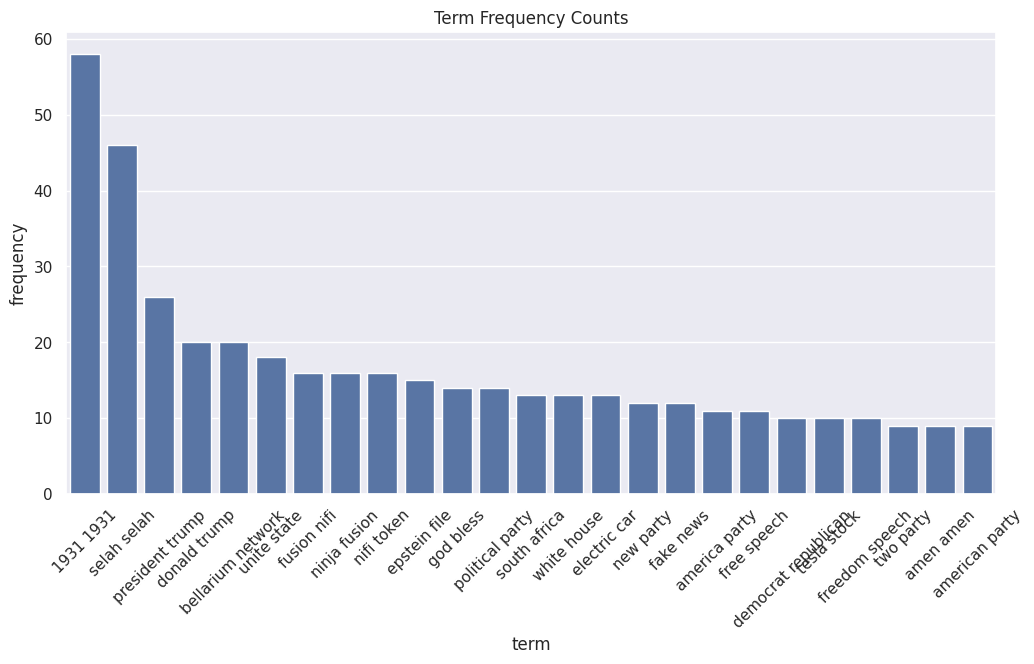

In [115]:
visualize_frequency(matrix, vectorizer, 'Term Frequency Counts')

Let's now try visualizing word counts for our `tweets` dataset.

In [116]:
vectorizer = CountVectorizer(stop_words=stopwords, ngram_range=(1, 1), max_features=2000)
matrix = vectorizer.fit_transform(corpus)

In [117]:
matrix.toarray().shape

(3202, 2000)

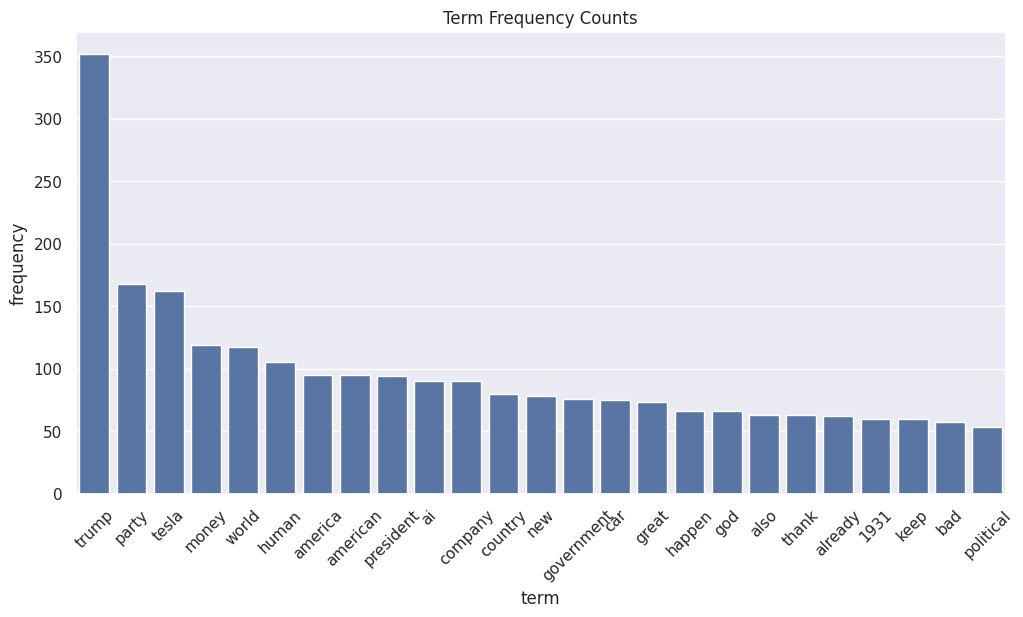

In [118]:
visualize_frequency(matrix, vectorizer, 'Term Frequency Counts')

Now that we can visualize term frequency bar charts, let's create a function that is able to output: (1) a word cloud, (2) a bar chart measuring unigram frequency, and (3) a bar chart measuring bigram frequency. This can help us automate the analysis of prevailing themes within our dataset.

First, let's combine everything that we did in the Word Cloud Analysis section into one neat function.

In [119]:
def create_wordcloud(tweets, max_words=50, title=None):
  """Create a wordcloud of most common words in a set of tweets"""

  comments_cleaned = comments['cleaned_text']

  # Remove null values
  comments_cleaned = comments_cleaned.dropna()

  # Join all tweets as one piece of string
  comments_cleaned = ' '.join(comments_cleaned)

  # Replace all spaces with commas
  comments_cleaned = comments_cleaned.replace(' ', ',')

  comments_cleaned
  wc = WordCloud(background_color="white",
               # colormap='plasma',
               max_words=100
               )

  wc.generate(comments_cleaned)
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  plt.close()

In [120]:
def visualize_comments(df):
  vectorizer_1gram = CountVectorizer(stop_words=stopwords, ngram_range=(1, 1), max_features=2000)
  matrix_1gram = vectorizer_1gram.fit_transform(df['cleaned_text'])
  vectorizer_2gram = CountVectorizer(stop_words=stopwords, ngram_range=(2, 2), max_features=2000)
  matrix_2gram = vectorizer_2gram.fit_transform(df['cleaned_text'])
  create_wordcloud(df)
  visualize_frequency(matrix_1gram, vectorizer_1gram, 'Unigram Frequency Counts')
  visualize_frequency(matrix_2gram, vectorizer_2gram, 'Bigram Frequency Counts')

Let's try applying the function on different analyses.

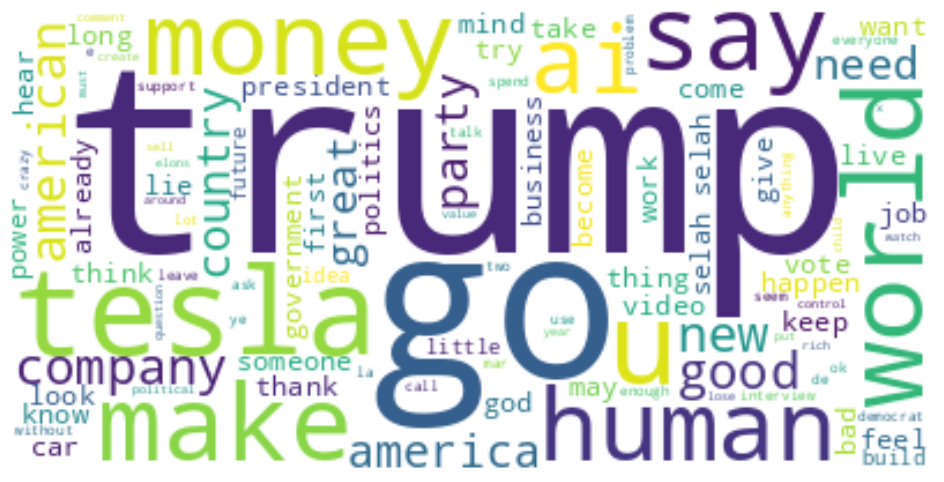

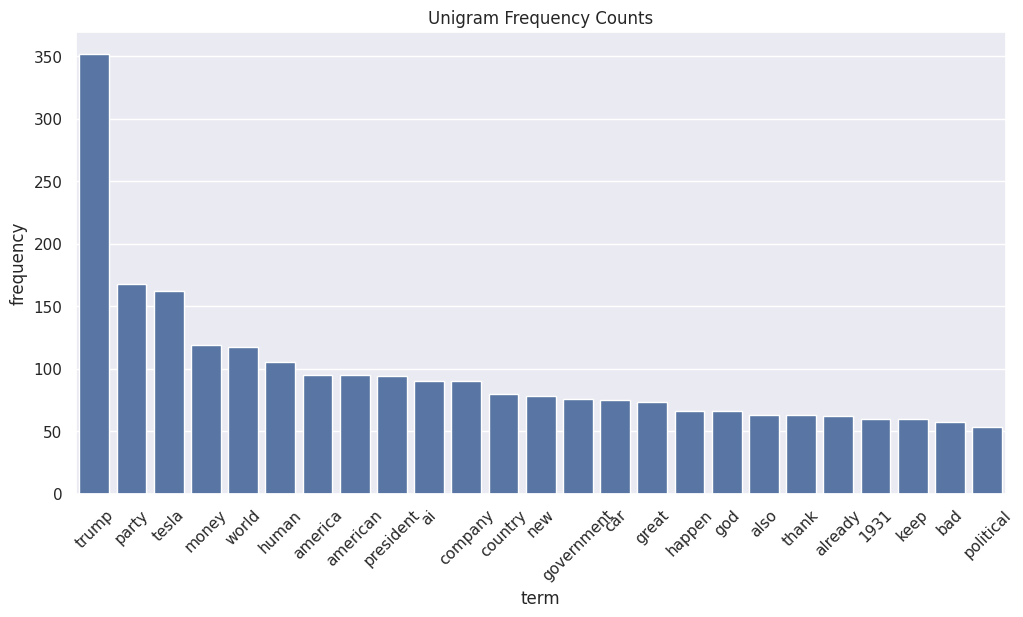

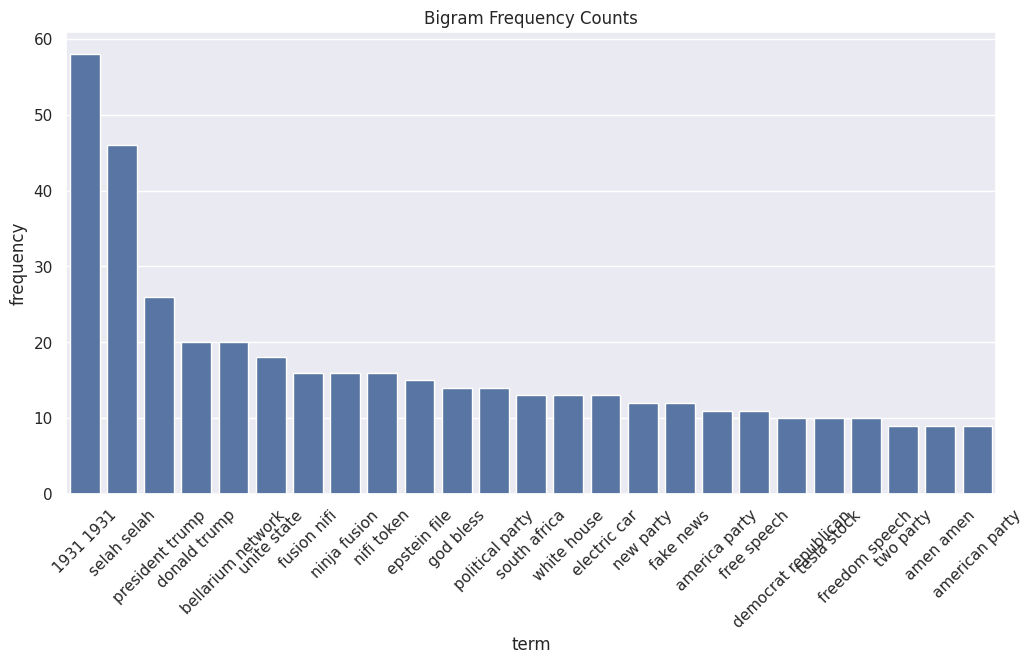

In [121]:
visualize_comments(comments)

In [122]:
comments['year'] = pd.to_datetime(comments['date_published']).dt.year
comments_per_year = comments['year'].value_counts().sort_index()
print("Number of comments per year:")
print(comments_per_year)

Number of comments per year:
year
2018      95
2019      39
2020       4
2021       8
2022       3
2023      44
2024     195
2025    2814
Name: count, dtype: int64


Visualizing comments for: 2025


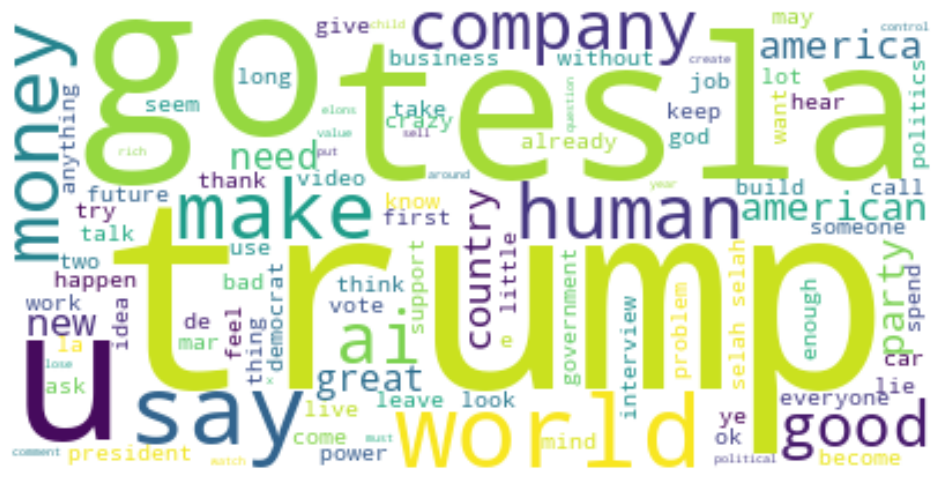

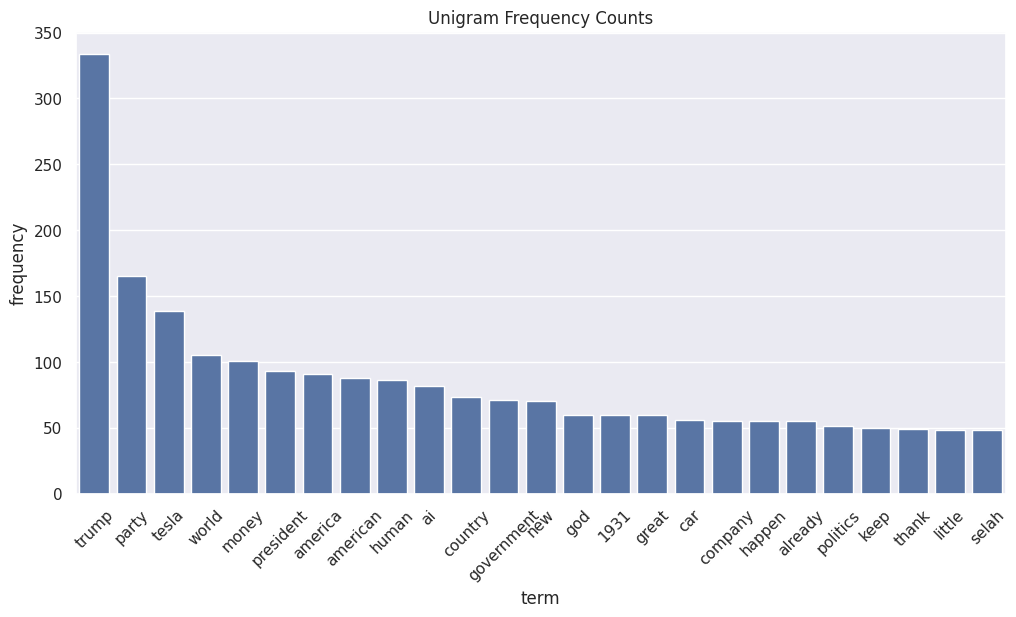

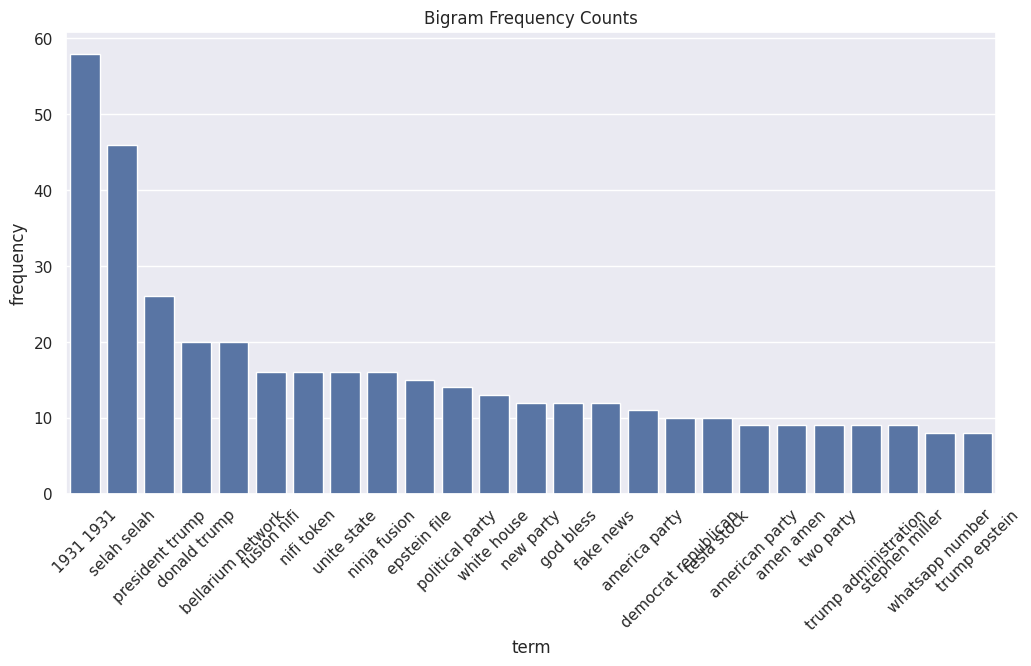

Visualizing comments for: Other Years


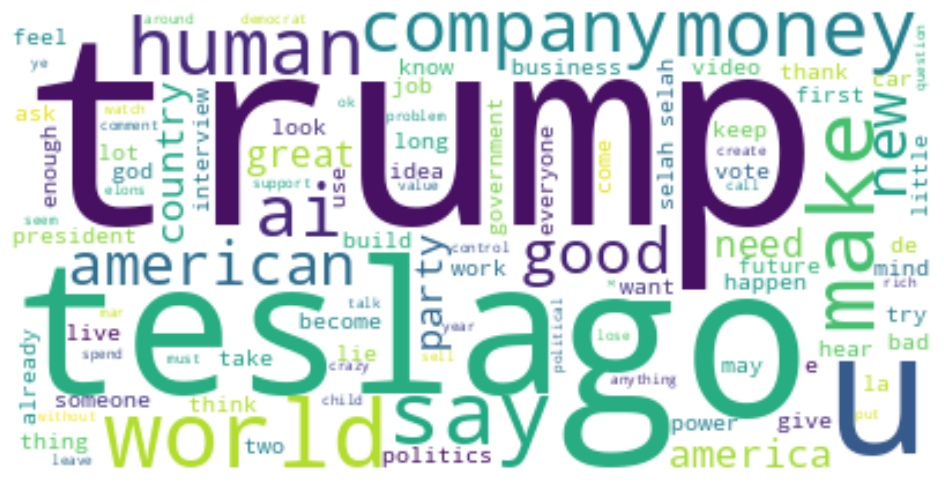

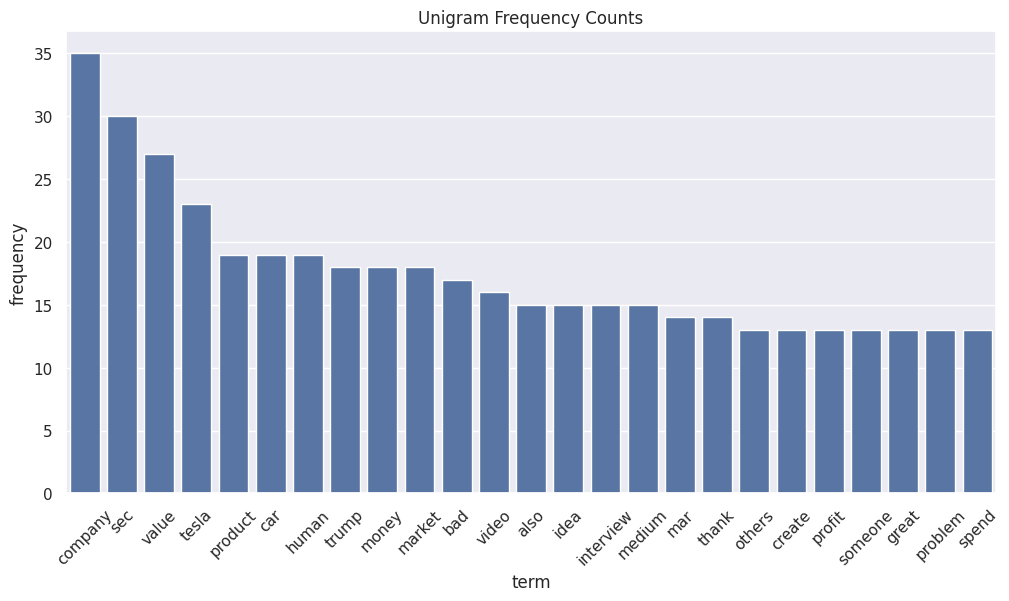

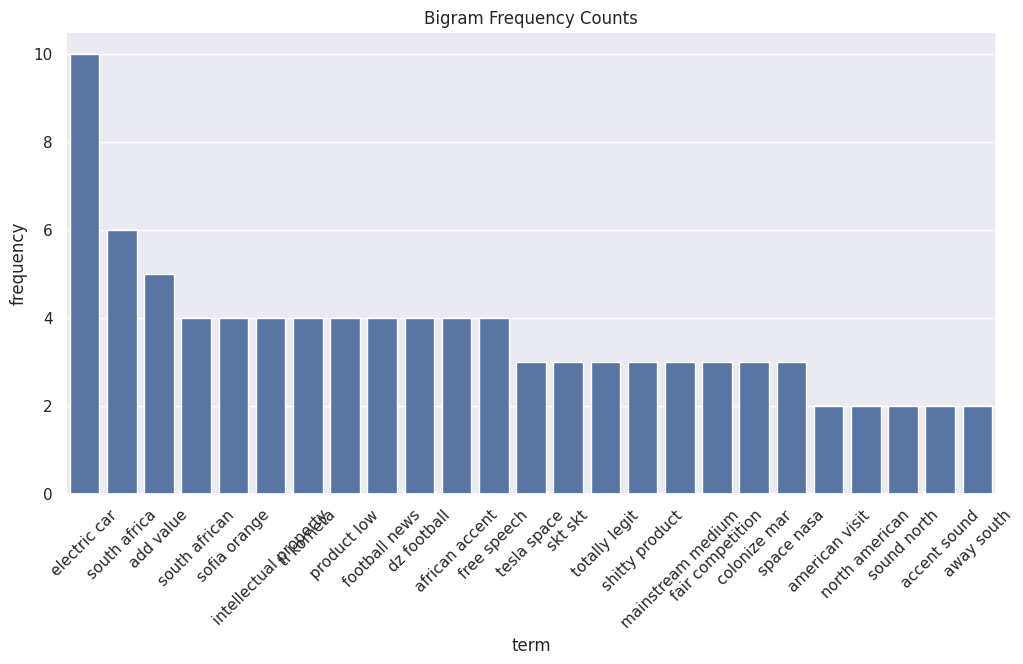

In [123]:
comments['year'] = pd.to_datetime(comments['date_published']).dt.year

# We grouped the comments to 2025 and other years because of the
                # data imbalance. Will add more videos from other years to fix this
comments['year_group'] = comments['year'].apply(lambda x: '2025' if x == 2025 else 'Other Years')

for year_group in comments['year_group'].unique():
    comments_year_group = comments[comments['year_group'] == year_group].copy()
    print(f"Visualizing comments for: {year_group}")
    visualize_comments(comments_year_group)